In [1]:
import geopandas as gpd
import shapely
import glob

from shapely.geometry import Polygon
from shapely.ops import unary_union
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
rd_string = ("+proj=sterea +lat_0=52.15616055555555 +lon_0=5.38763888888889 "
             "+k=0.999908 +x_0=155000 +y_0=463000 +ellps=bessel +units=m "
             "+towgs84=565.2369,50.0087,465.658,-0.406857330322398,0.350732676542563,-1.8703473836068,4.0812 "
             "+no_defs +no_defs")

In [3]:
path = r'D:\Projects\Pr\3317.30\Toelevering\20180918_update_baggervakken\180905_Boontjes Vak 1-15'
shp_files = glob.glob(r'{}\**\*.shp'.format(path), recursive=True)
print(shp_files, len(shp_files))

['D:\\Projects\\Pr\\3317.30\\Toelevering\\20180918_update_baggervakken\\180905_Boontjes Vak 1-15\\180905_Boontjes Vak 1-15.shp'] 1


In [4]:
gdf_union = gpd.GeoDataFrame()

In [5]:
gdf = gpd.read_file(shp_files[0])
gdf.crs = rd_string

In [6]:
polygons = []
for geom in gdf['geometry']:
    polygons.append(Polygon(geom))

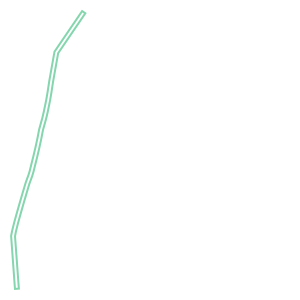

In [10]:
un2 = unary_union(polygons)
ls2 = shapely.geometry.LineString(un2.exterior)
ls2

In [12]:
gdf_union

""
0


In [15]:
gdf_union.at[0, 'geometry'] = un2 # somehow doenst work directly with LineString, so set first with Polygon
gdf_union.at[0, 'geometry'] = ls2 # once set, we can overwrite with LineString

In [16]:
gdf_union.to_file(r'D:\Projects\Pr\3317.30\Werkfolder\20180918_update_baggervakken/180905_Boontjes.shp')